In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"F:\Nividha\Lambton\1413_Intro_to_AI\Assignment_1\haberman_data.csv")
df.head()

,Age_of_patient,Patient's_year_of_operation,Number_of_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
df.Survival_status = df.Survival_status.replace(to_replace = [2], regex = True, value = [0])
df.head()

,Age_of_patient,Patient's_year_of_operation,Number_of_nodes,Survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
195,56,67,0,1
196,56,60,0,1
197,57,61,5,0
198,57,62,14,0


In [37]:
# to check if this is a binary classification prblem--it is so using logistic regression
print('Target variables  : ', df['Survival_status'])

(unique, counts) = np.unique(df['Survival_status'], return_counts=True)

print('Unique values of the target variable', unique)
print('Counts of the target variable :', counts)

Target variables  :  0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    0
305    0
Name: Survival_status, Length: 306, dtype: int64
Unique values of the target variable [0 1]
Counts of the target variable : [ 81 225]


In [38]:
# Putting feature variable to X
X = df.iloc[:,[0, 1, 2]]
# Putting response variable to y
y = df.iloc[:, 3]

In [39]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.20, random_state=0)

In [79]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 20)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=20)

In [80]:
predictions = model.predict(X_test)

In [81]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

accuracy =  (TP+TN) /(TP+FP+TN+FN)

print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP)  =  37
False Positive(FP) =  24
True Negative(TN)  =  1
False Negative(FN) =  0
Accuracy of the binary classification = 0.613


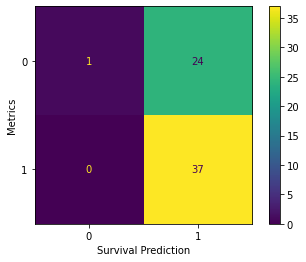

In [82]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test)  

plt.xlabel("Survival Prediction")
plt.ylabel("Survivors")
plt.show()